In [358]:
#!conda install --yes autograd
from autograd import grad, jacobian
import autograd.numpy as np   
import scipy.optimize as scipyopt
import matplotlib.pyplot as mpl


def f_x(x):
    
    return 3.5*x*(1-x)
    
grad_f_x = grad(f_x)


def compose(diff_function, val, iter):
    if iter == 1:
        
        return diff_function(val), f_x(val)
        
    g_x = f_x(val)

    for i in range(iter+1):
        g_x = f_x(g_x)

    
    return diff_function(g_x), f_x(g_x)

compositions = [1,10,100, 1000]

for comp in compositions:
    val = compose(grad_f_x, 0.50, comp)
    print(str(comp) + " Compositions: " + str(val))


1 Compositions: (0.0, 0.875)
10 Compositions: (-0.006189560607075428, 0.8749972635242493)
100 Compositions: (0.8202622188787307, 0.8269407065914387)
1000 Compositions: (0.8202622188787307, 0.8269407065914387)


In [303]:
grad_f_x(0.8269407312015444)

-2.2885851184108112

In [356]:
def unpack(thetas, dims):
    n_i = dims[0]
    n_h = dims[1]
    n_o = dims[2]
    W_1 = thetas[:n_i*n_h].reshape((n_h,n_i))
    print(W_1.shape)
    thetas = thetas[n_i*n_h:]
    b_1 = thetas[:n_h]
    print(b_1)
    thetas = thetas[n_h:]
    W_2 = thetas[:n_o*n_h].reshape((n_o,n_h))
    thetas = thetas[n_o*n_h:]
    b_2 = thetas
    
    return W_1, b_1, W_2, b_2

def network(x, theta, dims, sigma = np.tanh):
    
    W_1, b_1, W_2, b_2 = unpack(theta, dims)
    print(W_1.shape)
    print(x.shape)
    y = sigma(W_2@sigma(W_1@x + b_1) + b_2)
    return y
    
thetas = []
dims = [1,100,1]
y = []

x = np.random.uniform(-10,10,1)

thetas = np.random.normal(0,1,301)

network_jac = jacobian(network)

np.linalg.svd(activation_jac(thetas), compute_uv=False)

#network(x, thetas, dims)


array([0.99999996, 0.99990064, 0.99987204, 0.99985591, 0.99975549,
       0.99960259, 0.99958763, 0.99954496, 0.99951749, 0.99950549,
       0.99939194, 0.99937965, 0.99925065, 0.99909823, 0.9990767 ,
       0.99869443, 0.99864628, 0.99783469, 0.99750467, 0.99741225,
       0.99682107, 0.99663105, 0.99624292, 0.99502749, 0.99498233,
       0.99449533, 0.99288348, 0.99193926, 0.99165388, 0.99165344,
       0.98965027, 0.98963816, 0.98802116, 0.98728669, 0.98704482,
       0.98185171, 0.98167498, 0.9767072 , 0.97571425, 0.97407094,
       0.97319755, 0.97261754, 0.97182395, 0.97111242, 0.97104135,
       0.97015377, 0.96792637, 0.96773524, 0.96598588, 0.96301489,
       0.95938331, 0.95915936, 0.95722285, 0.95592136, 0.95326002,
       0.95092198, 0.94931884, 0.94665769, 0.93892439, 0.93558632,
       0.92865218, 0.92816981, 0.92404656, 0.92277835, 0.92083331,
       0.92032081, 0.91634945, 0.91586625, 0.91391559, 0.91254483,
       0.90827871, 0.90240451, 0.89960832, 0.8979093 , 0.89644

In [ ]:
np.arange(13)[0]

In [5]:
def sloppy(N, thetas, t):
    
    t_vector = np.zeros(len(t))
    
    for each in range(len(t)):
    
        tot_val = 0
    
        for term in range(N):

            val = np.exp(-thetas[term]*t[each])

            tot_val += val
            
        t_vector[each] = tot_val / N
    
    return t_vector

ε = 0.000001
t = np.arange(0,10 + ε,0.5)
N = 2
thetas_actual = [2,3]

thetas_possible = np.linspace(1.5,3.5,200)

plot, _ = np.meshgrid(thetas_possible, thetas_possible)

cost_matrix = np.zeros(plot.shape)

def Cost(thetas_try):
    
    return np.linalg.norm(sloppy(2, thetas_try, t) - sloppy(2, thetas_actual, t))


for xcase in range(len(thetas_possible)):

    for ycase in range(len(thetas_possible)):

        cost_matrix[xcase, ycase] = Cost([thetas_possible[xcase], thetas_possible[ycase]])
        



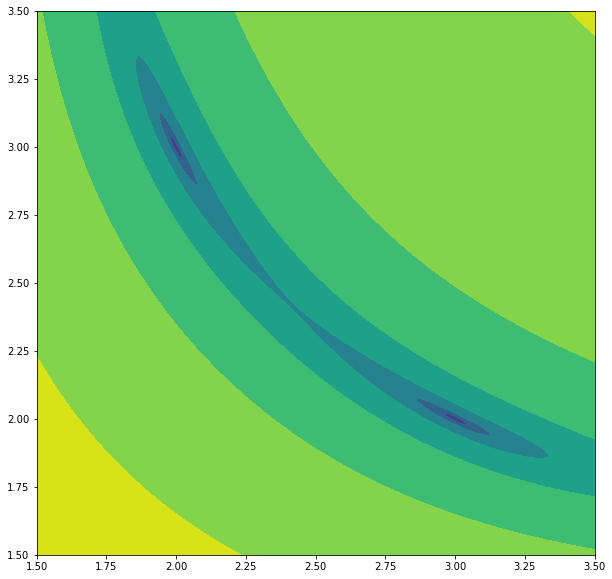

In [6]:
mpl.figure(figsize=(10, 10))
mpl.contourf(plot, plot.T, np.log(cost_matrix))


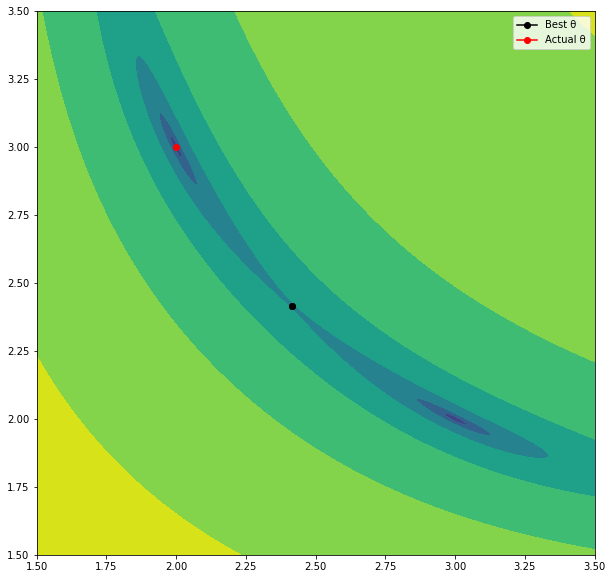

In [40]:
guess = np.mean(thetas_possible)

obj = scipyopt.minimize(Cost, [guess,guess])
theta_best = obj.x

mpl.figure(figsize=(10, 10))
mpl.plot(theta_best, theta_best, marker="o", color = "black", label = "Best θ")
mpl.plot(thetas_actual[0], thetas_actual[1], marker="o", color = "red", label = "Actual θ")
mpl.contourf(plot, plot.T, np.log(cost_matrix))
mpl.legend()

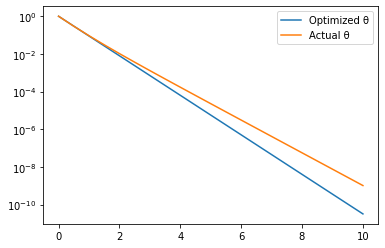

In [61]:
line1 = sloppy(2, theta_best, t)
line2 = sloppy(2, thetas_actual, t)

mpl.plot(t,line1, label = "Optimized θ")
mpl.plot(t,line2, label = "Actual θ")
mpl.legend()
mpl.yscale("log")

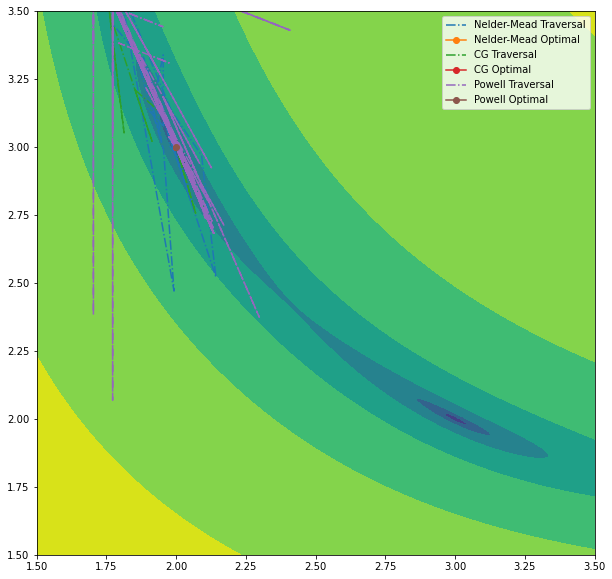

In [92]:
mpl.figure(figsize=(10, 10))


def CostWrapper(thetas_try):
    
    params_trail.append([thetas_try[0],thetas_try[1]])
    return Cost(thetas_try)

def unpack_Points(array):
    
    xs = [x[0] for x in array]
    ys = [x[1] for x in array]
    
    return xs, ys

methods = ["Nelder-Mead", "CG", "Powell"]

for method in methods:
    
    params_trail = []
    scipyopt.minimize(CostWrapper, [1,4], method = method)
    n = len(params_trail)
    x, y = unpack_Points(params_trail)
    mpl.plot(x,y, label = method + " Traversal", linestyle = "-.")
    mpl.plot(params_trail[n-1][0], params_trail[n-1][1], marker="o", label = method + " Optimal")


mpl.contourf(plot, plot.T, np.log(cost_matrix))
ax = mpl.gca()
ax.set_ylim([1.5,3.5])
ax.set_xlim([1.5,3.5])

mpl.legend()

In [240]:
import autograd.numpy as np
from autograd import grad, jacobian


starting_pts = np.genfromtxt("mgh17_startingpoints.txt").T
t = np.genfromtxt("mgh17.txt", skip_header=1)

t, f_t = unpack_Points(t)

t = np.array(t)

def model(thetas):
    
    tht1, tht2, tht3, tht4, tht5 = thetas
    
    return tht1 + (tht2*(np.exp(-tht4*t))) + (tht3*(np.exp(-tht5*t)))
        
jacobian = jacobian(model) 

for pts in starting_pts:
    
    jac_matrix = jacobian(pts)
    singulars = np.linalg.svd(jac_matrix, compute_uv=False)
    fim = jac_matrix.T @ jac_matrix
    cond = np.linalg.cond(fim)
    print("\n")
    print("Starting estimates")
    print(pts)
    print("Condition number: " + str(cond))   



Starting estimates
[  50.  150. -100.    1.    2.]
Condition number: 2.451413042189594e+34


Starting estimates
[ 0.5   1.5  -1.    0.01  0.02]
Condition number: 1696622574.6158464


Starting estimates
[ 0.37541005  1.93584691 -1.46468714  0.01286753  0.0221227 ]
Condition number: 3736160777.8450513


In [212]:
import pandas as pd

tbl = pd.DataFrame(columns = ["method", "thetas_start", "cond number", "thetas_optimal", "cost", "pass?"])

methods = ["Nelder-Mead", "CG", "Powell"]

def Cost(thetas_try):
    
    return np.linalg.norm(model(thetas_try) - f_t)

for method in methods: #parts b and c combined

    for pts in starting_pts:
        
        passed = True

        result = scipyopt.minimize(Cost, pts, method = method)
        cost = result.fun
        result = result['x']
        result = [np.round(x,2) for x in result]

        jac_matrix = jacobian(pts)
        singulars = np.linalg.svd(jac_matrix, compute_uv=False)
        fim = jac_matrix.T @ jac_matrix
        cond = np.linalg.cond(fim)
        
        if cost > .01:
            
            passed = False
        
        tbl.loc[len(tbl.index)] = [method, pts, cond, result, cost, passed] 
        
tbl

C:\Users\Tanner\anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
C:\Users\Tanner\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Tanner\anaconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


,method,thetas_start,cond number,thetas_optimal,cost,pass?
0,Nelder-Mead,"[50.0, 150.0, -100.0, 1.0, 2.0]",2.451413e+34,"[0.62, 146.75, -118.02, 1.38, 2.56]",1.051641,False
1,Nelder-Mead,"[0.5, 1.5, -1.0, 0.01, 0.02]",1.696623e+09,"[0.38, 2.25, -1.78, 0.01, 0.02]",0.005049,True
2,Nelder-Mead,"[0.37541005211, 1.9358469127, -1.4646871366, 0...",3.736161e+09,"[0.38, 3.02, -2.55, 0.01, 0.02]",0.004550,True
3,CG,"[50.0, 150.0, -100.0, 1.0, 2.0]",2.451413e+34,"[0.62, 150.0, -100.0, 0.63, 2.0]",1.012345,False
4,CG,"[0.5, 1.5, -1.0, 0.01, 0.02]",1.696623e+09,"[0.37, 1.49, -1.01, 0.01, 0.02]",0.008525,True
5,CG,"[0.37541005211, 1.9358469127, -1.4646871366, 0...",3.736161e+09,"[0.37, 1.94, -1.46, 0.01, 0.02]",0.005673,True
6,Powell,"[50.0, 150.0, -100.0, 1.0, 2.0]",2.451413e+34,"[0.61, 6464.76, -234058.69, 1.0, 1.99]",1.011366,False
7,Powell,"[0.5, 1.5, -1.0, 0.01, 0.02]",1.696623e+09,"[0.36, 1.37, -0.89, 0.01, 0.03]",0.010399,False
8,Powell,"[0.37541005211, 1.9358469127, -1.4646871366, 0...",3.736161e+09,"[0.37, 1.95, -1.47, 0.01, 0.02]",0.005651,True


<AxesSubplot:title={'center':'Relationship between condition number/FIM and optimal cost'}, xlabel='cost'>

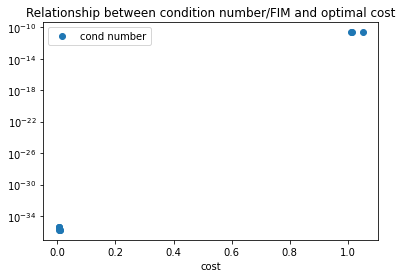

In [217]:
tbl['cond number'] = tbl['cond number'] / 1000000000

tbl.plot(x='cost', y='cond number', style='o', logy=True, title="Relationship between condition number/FIM and optimal cost")

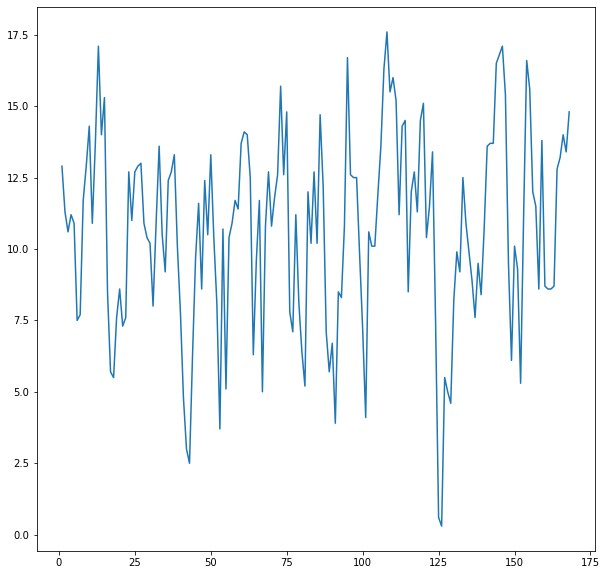

In [253]:
data = np.genfromtxt("ENSO.txt")

t, f_t = unpack_Points(data)
mpl.figure(figsize=(10, 10))
mpl.plot(t,f_t)

In [250]:
#5d

import autograd.numpy as np
from autograd import grad, jacobian


def partial_model(theta):
    
    return np.sin((6.28*t)/theta) + np.cos((6.28*t)/theta)

partials = jacobian(partial_model)


normed_tht4 = np.linalg.norm(partials(5.0))
normed_tht7 = np.linalg.norm(partials(20.0))

print("Theta_4 Norm of Partials, Feasible: " + str(np.round(normed_tht4,2)))
print("Theta_7 Norm of Partials, Feasible: " + str(np.round(normed_tht7,2)))
print("\n")

normed_tht4 = np.linalg.norm(partials(0.05))
normed_tht7 = np.linalg.norm(partials(0.001))

print("Theta_4 Norm of Partials, Very Small: " + str(np.round(normed_tht4,2)))
print("Theta_7 Norm of Partials, Very Small: " + str(np.round(normed_tht7,2)))
print("\n")

normed_tht4 = np.linalg.norm(partials(8000.0))
normed_tht7 = np.linalg.norm(partials(450.0))

print("Theta_4 Norm of Partials, Very Large: " + str(np.round(normed_tht4,2)))
print("Theta_7 Norm of Partials, Very Large: " + str(np.round(normed_tht7,2)))





Theta_4 Norm of Partials, Feasible: 306.88
Theta_7 Norm of Partials, Feasible: 17.43


Theta_4 Norm of Partials, Very Small: 2770800.11
Theta_7 Norm of Partials, Very Small: 7065439795.65


Theta_4 Norm of Partials, Very Large: 0.0
Theta_7 Norm of Partials, Very Large: 0.03


In [268]:
t = np.array(t)

def ENSO(thetas):
    
    tht1, tht2, tht3, tht4, tht5, tht6, tht7, tht8, tht9 = thetas
    
    return tht1 + tht2*np.cos((6.28*t)/12) + tht3*np.sin((6.28*t)/12) + tht5*np.cos((6.28*t)/tht4) + tht6*np.sin((6.28*t)/tht4) + tht8*np.cos((6.28*t)/tht7) + tht9*np.sin((6.28*t)/tht7)

thetas_try = np.array([np.array([10.5,3,5,3,4.5,5.5,95,2.5,3.75]),np.array([10.5,3,5,450,4.5,5.5,1000,2.5,3.75]),np.array([1,30,50,0.01,150,50.5,0.0003,2.5,0.375])]) #first try- good guessses, second try mixed, last try bad

def Cost(thetas_try):
    
    return np.linalg.norm(ENSO(thetas_try) - f_t)

quality = ["Good Estimates", "Bad Period Estimates", "Bad Estimates"]

qualityIndex = 0

for each in thetas_try:

    result = scipyopt.minimize(Cost, each, method = "CG")
    params = result['x']
    cost = result['fun']
    print(quality[qualityIndex])
    print("Optimal Parameters: ")
    print(params)
    print("Cost: ")
    print(cost)
    print("\n")
    qualityIndex += 1
    


Good Estimates
Optimal Parameters: 
[10.65658301  3.0698849   0.43770151 -0.50918919  0.1676369   1.25670425
 94.79795823  0.37401247 -0.17006315]
Cost: 
31.75183329691167


Bad Period Estimates
Optimal Parameters: 
[ 1.55414433e+02  3.04801768e+00  4.11648174e-01  3.44726195e+02
 -1.28311327e+00  2.37543321e+01  9.66619036e+02 -1.41799075e+02
 -9.10751157e+01]
Cost: 
33.315158797630666


Bad Estimates
Optimal Parameters: 
[1.00e+00 3.00e+01 5.00e+01 1.00e-02 1.50e+02 5.05e+01 3.00e-04 2.50e+00
 3.75e-01]
Cost: 
1581.4641670099977




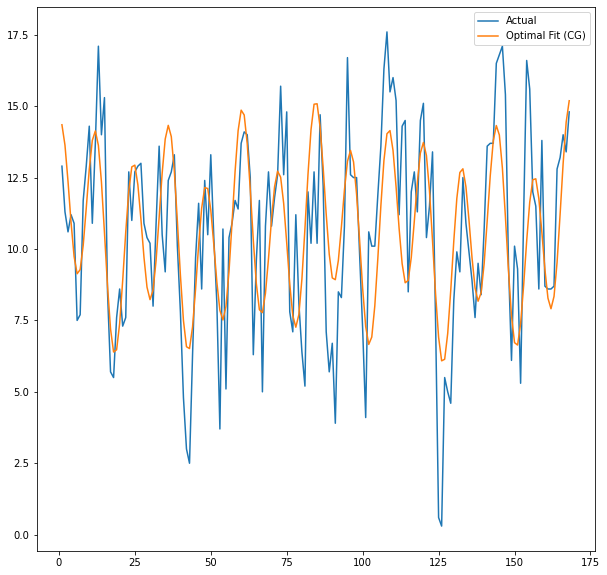

In [273]:
result = scipyopt.minimize(Cost, thetas_try[0], method = "CG")['x']
f_t_opt = ENSO(result)

mpl.figure(figsize=(10, 10))
mpl.plot(t,f_t, label = "Actual")
mpl.plot(t,f_t_opt, label = "Optimal Fit (CG)")
mpl.legend()

In [280]:
import autograd.numpy as np
from autograd import grad, jacobian


#diagonal of covar matrix, which is obtained from FIM

ENSO_jacobian = jacobian(ENSO)

ENSO_jacobian = ENSO_jacobian(result)

fim = ENSO_jacobian.T @ ENSO_jacobian

fim_inv = np.linalg.inv(fim)

error_normed = np.linalg.norm(f_t - f_t_opt)

sigma = error_normed/np.sqrt(len(f_t)-9)

cov_matrix = fim_inv * (sigma**2)

print("Variance in Parameter Estimates: ")
np.diagonal(cov_matrix)

Variance in Parameter Estimates: 


array([4.43869843e-02, 7.55778553e-02, 7.58118603e-02, 3.65022728e-08,
       3.15440639e-01, 8.05487176e-02, 3.71882174e+02, 1.10320808e-01,
       2.71778989e-01])